## About Dataset
### Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df = pd.read_csv('mobile_price_classification.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Analysis

Verifying the correlation between features

<AxesSubplot: >

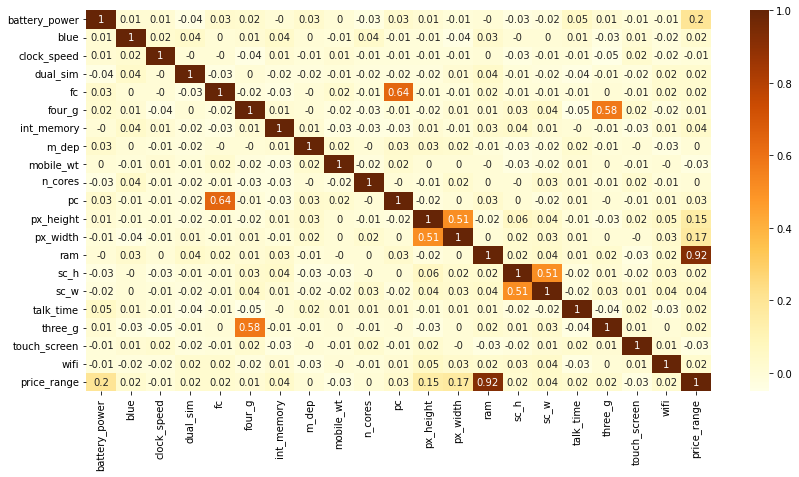

In [6]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

Strong correlation is observed between price_range and ram

Model Building

In [7]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Desicsion Tree

In [9]:
criterion = ['entropy', 'gini']
max_depth = np.arange(1, 11)
min_samples_split = np.arange(2, 7)
parameters = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split}

model = DecisionTreeClassifier()
grid_DTC = GridSearchCV(estimator = model, param_grid = parameters, cv = 5)
grid_DTC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([2, 3, 4, 5, 6])})

In [10]:
grid_DTC.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}

In [199]:
grid_DTC.best_score_

0.8507142857142858

Running Desicion Tree

In [11]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth= 8, min_samples_split=2, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

In [12]:
decision_tree_score = accuracy_score(y_test, previsoes)
decision_tree_score

0.8533333333333334

We have 85,3% accuracy. It's good result for Desicion Tree

In [13]:
classification_decision = classification_report(y_test, previsoes)
print(classification_decision)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.80      0.79      0.80       135
           2       0.79      0.81      0.80       151
           3       0.90      0.90      0.90       163

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



Checking the most important variables of the model

In [14]:
columns = df.drop('price_range', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

ram              0.679529
battery_power    0.136872
px_width         0.072622
px_height        0.068050
clock_speed      0.009146
int_memory       0.006794
pc               0.006407
m_dep            0.004531
mobile_wt        0.004247
talk_time        0.004065
sc_h             0.002671
sc_w             0.002133
three_g          0.001430
blue             0.000770
wifi             0.000733
n_cores          0.000000
four_g           0.000000
fc               0.000000
dual_sim         0.000000
touch_screen     0.000000
dtype: float64

### Random Forest

In [15]:
n_estimators = np.array([100])
criterion = ['entropy', 'gini']
max_depth = np.arange(4, 11)
min_samples_split = np.arange(2, 5)
parameters = {'n_estimators': n_estimators, 'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = parameters, cv = 5)
gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([100])})

In [16]:
gridRandomForest.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 4,
 'n_estimators': 100}

In [17]:
gridRandomForest.best_score_

0.875

Running Random Forest

In [18]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_split=4)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

In [19]:
random_forest_score = accuracy_score(y_test, previsoes)
random_forest_score

0.855

We have 85,5% accuracy

In [20]:
classification_random = classification_report(y_test, previsoes)
print(classification_random)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       151
           1       0.77      0.79      0.78       135
           2       0.79      0.72      0.75       151
           3       0.90      0.94      0.92       163

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [21]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

ram              0.549418
battery_power    0.080916
px_width         0.056790
px_height        0.053488
mobile_wt        0.032448
int_memory       0.030168
talk_time        0.023433
sc_w             0.022971
pc               0.022898
clock_speed      0.021753
sc_h             0.021469
m_dep            0.019812
fc               0.018333
n_cores          0.018050
blue             0.005258
four_g           0.004759
wifi             0.004675
dual_sim         0.004578
touch_screen     0.004532
three_g          0.004250
dtype: float64

There are no noticeable changes compared to the previous algorithm

### Gradient Boosting

**GridSearchCV worked for a long time. So I had to configure it manually**

In [22]:
GBC = GradientBoostingClassifier(n_estimators=200,learning_rate=0.3, min_samples_split=4, min_samples_leaf=3, max_depth=2)
GBC.fit(X_train, y_train)
previsoes = GBC.predict(X_test)

In [23]:
gradient_boosting_score = accuracy_score(y_test, previsoes)
gradient_boosting_score

0.9133333333333333

**Best score so far**

In [24]:
classification_gradient = classification_report(y_test, previsoes)
print(classification_gradient)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       151
           1       0.87      0.87      0.87       135
           2       0.87      0.87      0.87       151
           3       0.96      0.94      0.95       163

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



In [25]:
feature_imp_gradient = pd.Series(GBC.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_gradient

ram              0.831529
battery_power    0.080754
px_height        0.038624
px_width         0.027123
mobile_wt        0.005557
int_memory       0.004476
n_cores          0.003137
talk_time        0.002244
m_dep            0.001803
sc_w             0.001395
pc               0.000927
fc               0.000853
sc_h             0.000511
four_g           0.000299
wifi             0.000280
clock_speed      0.000234
touch_screen     0.000146
blue             0.000069
three_g          0.000039
dual_sim         0.000000
dtype: float64

### ExtraTreesClassifier

In [26]:
n_estimators = np.array([200])
criterion = ['entropy', 'gini']
max_depth = np.array([1, 3, 5])
min_samples_leaf = np.array([1, 2, 3])
min_samples_split = np.array([2, 3, 4])
parameters = {'n_estimators': n_estimators, 'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = parameters, cv = 5)
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([1, 3, 5]),
                         'min_samples_leaf': array([1, 2, 3]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([200])})

In [27]:
gridExtraTrees.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [28]:
gridExtraTrees.best_score_

0.8521428571428572

Running Extra Trees

In [29]:
ETC = ExtraTreesClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
ETC.fit(X_train, y_train)
previsoes = ETC.predict(X_test)

In [30]:
extra_trees_score = accuracy_score(y_test, previsoes)
extra_trees_score

0.8483333333333334

84,8% accuracy 

In [31]:
classification_extra = classification_report(y_test, previsoes)
print(classification_extra)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       151
           1       0.75      0.75      0.75       135
           2       0.82      0.68      0.74       151
           3       0.90      0.97      0.93       163

    accuracy                           0.85       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.85      0.84       600



In [32]:
feature_imp_extra = pd.Series(ETC.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_extra

ram              0.719354
battery_power    0.068722
px_width         0.038333
px_height        0.030069
n_cores          0.015659
touch_screen     0.011608
int_memory       0.011247
mobile_wt        0.010596
m_dep            0.009594
talk_time        0.009134
sc_w             0.008731
sc_h             0.008728
blue             0.008638
pc               0.008593
clock_speed      0.008165
four_g           0.008144
dual_sim         0.007351
fc               0.007038
wifi             0.005552
three_g          0.004744
dtype: float64

### AdaBoostClassifier

In [33]:
n_estimators = np.array([50, 100, 300, 500])
learning_rate = np.array([0.5, 1.0, 2.0, 0.25])
parameters = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = AdaBoostClassifier()
gridAdaBoost = GridSearchCV(estimator = model, param_grid = parameters, cv = 5)
gridAdaBoost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.5 , 1.  , 2.  , 0.25]),
                         'n_estimators': array([ 50, 100, 300, 500])})

In [34]:
gridAdaBoost.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

In [35]:
gridAdaBoost.best_score_

0.6935714285714286

Expected more :(

In [36]:
ABC = AdaBoostClassifier(learning_rate=1.0, n_estimators=50)
ABC.fit(X_train, y_train)
previsoes = ABC.predict(X_test)

In [37]:
ada_boost_score = accuracy_score(y_test, previsoes)
ada_boost_score

0.625

**62,5% accuracy. Bad result**

In [38]:
classification_ada = classification_report(y_test, previsoes)
print(classification_ada)

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       151
           1       0.44      0.84      0.58       135
           2       0.48      0.39      0.43       151
           3       0.92      0.66      0.77       163

    accuracy                           0.62       600
   macro avg       0.69      0.63      0.63       600
weighted avg       0.70      0.62      0.64       600



In [39]:
feature_imp_ada = pd.Series(ABC.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_ada

ram              0.56
battery_power    0.16
px_width         0.12
px_height        0.10
talk_time        0.04
int_memory       0.02
touch_screen     0.00
three_g          0.00
sc_w             0.00
sc_h             0.00
pc               0.00
blue             0.00
n_cores          0.00
mobile_wt        0.00
m_dep            0.00
four_g           0.00
fc               0.00
dual_sim         0.00
clock_speed      0.00
wifi             0.00
dtype: float64

In [41]:
models_df = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Extra Trees', 'Ada Boost'], 'Score': [decision_tree_score, random_forest_score, gradient_boosting_score, extra_trees_score, ada_boost_score]})
models_df

,Model,Score
0,Decision Tree,0.853333
1,Random Forest,0.855000
2,Gradient Boosting,0.913333
3,Extra Trees,0.848333
4,Ada Boost,0.625000


# Conclusion

The most effective method was Gradient Boosting and the most important feature was ram